# Example script

This simple Jupyter Notebook will exemplify a simple workflow using this library, starting from data fusion and ending with prediction.

## Step zero: install the library (and get the example data)
Let's install the package from `PyPI`.

In [1]:
%pip install chemfusekit

# Optional: download the example data from the repository (you could upload your own files)
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/qepas.xlsx
!wget https://github.com/f-aguzzi/tesi/raw/main/tests/rt.xlsx

# Automatically inline the graphs
%matplotlib inline

/Users/federicoaguzzi/Desktop/progetto/.venv/bin/python: No module named pip
Note: you may need to restart the kernel to use updated packages.
--2024-06-13 17:05:23--  https://github.com/f-aguzzi/tesi/raw/main/tests/qepas.xlsx
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/f-aguzzi/tesi/main/tests/qepas.xlsx [following]
--2024-06-13 17:05:23--  https://raw.githubusercontent.com/f-aguzzi/tesi/main/tests/qepas.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 590311 (576K) [application/octet-stream]
Saving to: ‘qepas.xlsx.3’

qepas.xlsx.3        100%[===================>] 576.48K  --.-KB/s    

## First step: Low-Level Data Fusion
- the `DF` class is used for data fusion
- the `DFSettings` class is a helper class for setting up `DF`
- `DF` data can then be exported, or used for further processing

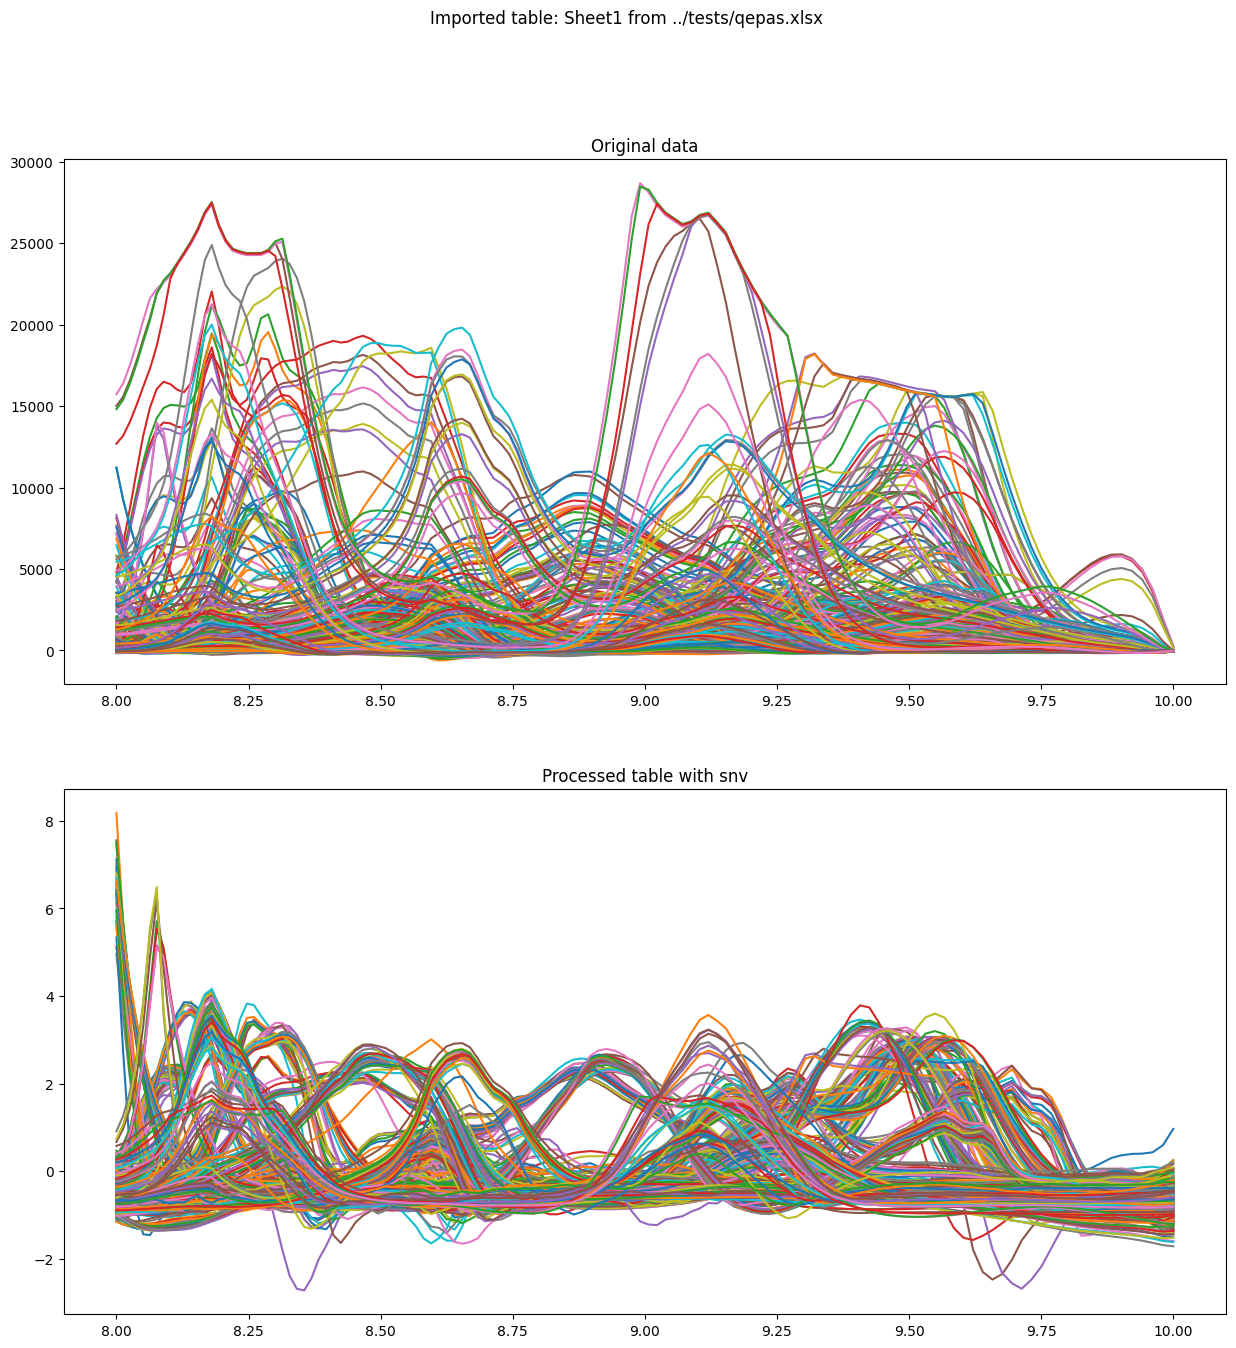

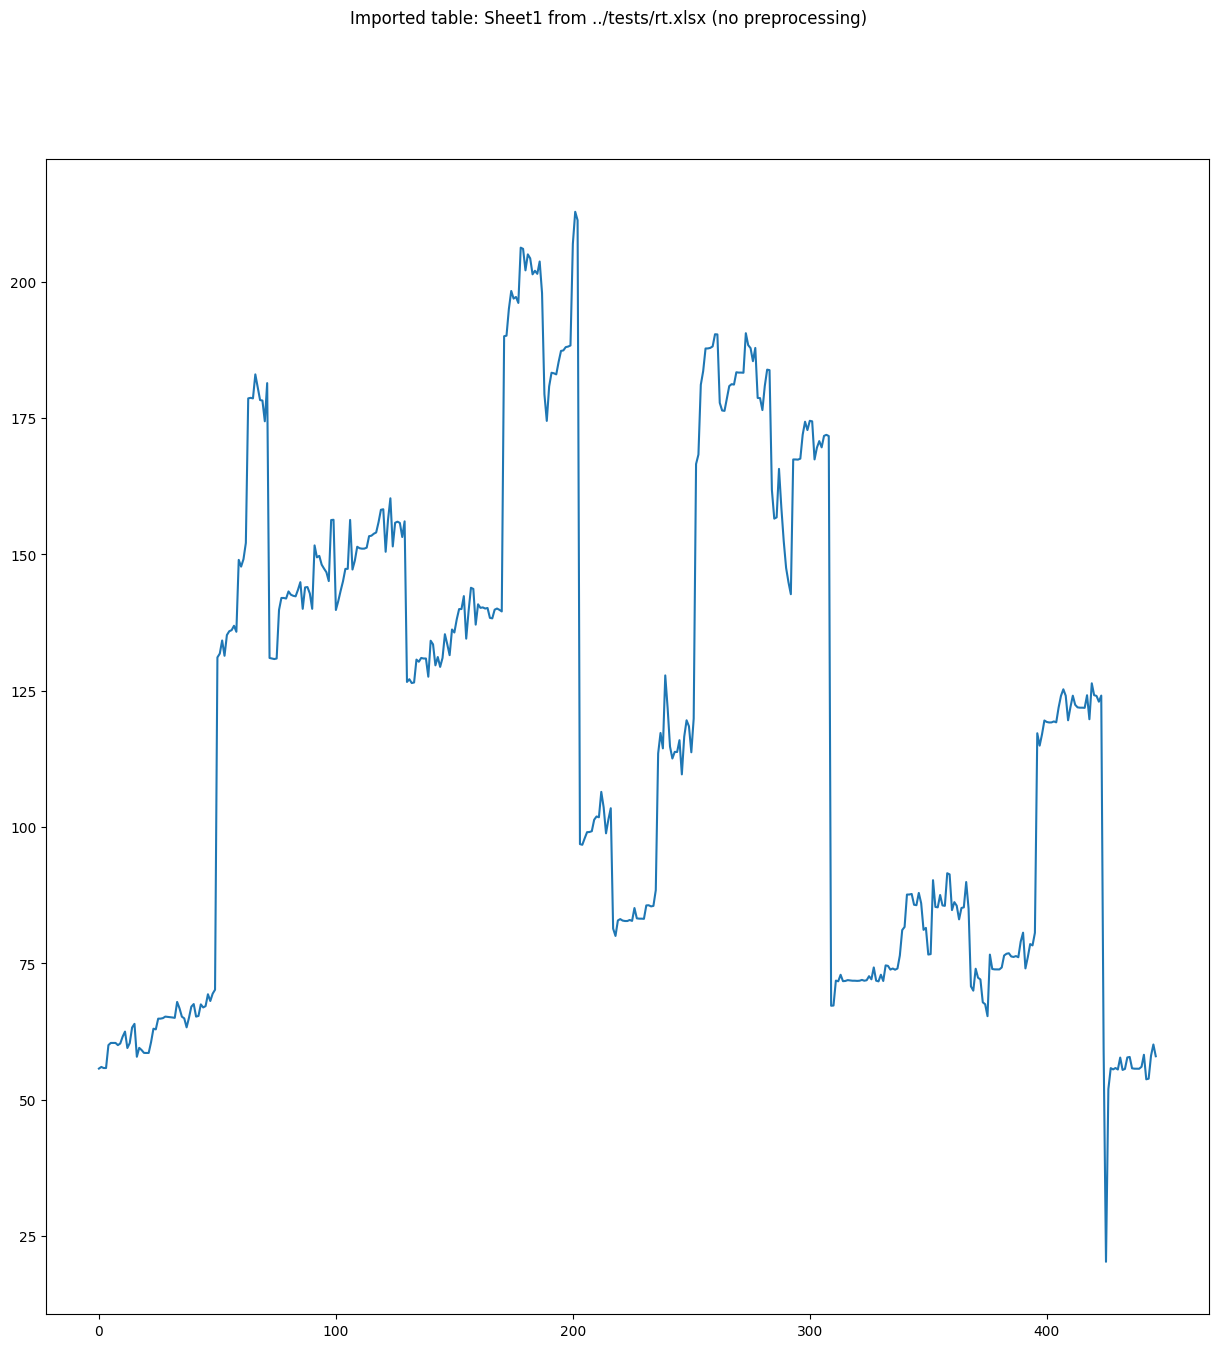

In [1]:
from chemfusekit.df import DFSettings, DF, Table

# Initialize the settings for low-level data fusion
# Perform preliminary data fusion
df_settings = DFSettings(output='graphical')
qepas_table = Table(
    file_path="qepas.xlsx",
    sheet_name="Sheet1",
    preprocessing="snv"
)
rt_table = Table(
    file_path="rt.xlsx",
    sheet_name="Sheet1",
    preprocessing="none"
)

tables = [qepas_table, rt_table]

# Initialize and run low-level data fusion
df = DF(df_settings, tables)
df.fuse()

In [ ]:
# (optional) export the LLDF data to an Excel file
df.export_data('output_file.xlsx')

## Second step: PLSDA

- the `PLSDA` class provides Partial Least Squares Discriminant Analysis tools
- the `PLSDASettings` helper class holds the settings for the `PLSDA` class

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and be

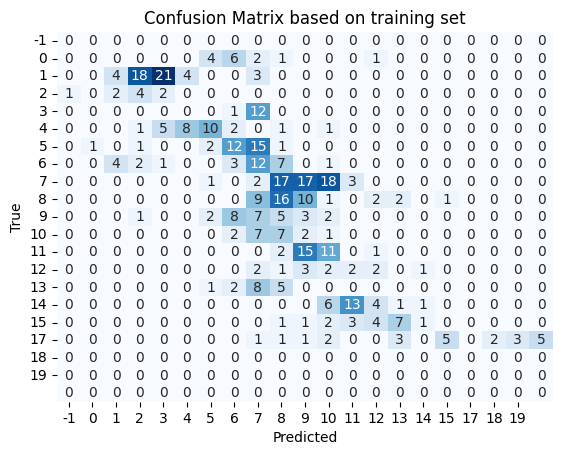

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/federicoaguzzi/Desktop/progetto/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning:

Recall is ill-defined and be

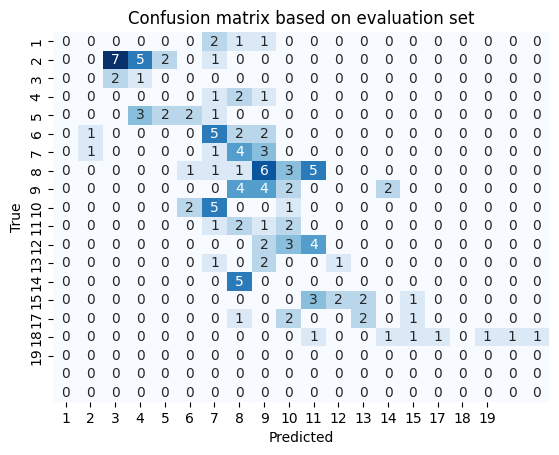

In [4]:
from chemfusekit.plsda import PLSDASettings, PLSDA

# Initialize the settings for Principal Component Analysis
plsda_settings = PLSDASettings(
    n_components=4, # Number of components
    output='graphical',   # graphs will be printed as pictures
    test_split=True # Split testing will be carried out
)

# Initialize and run the PLSDA class
plsda = PLSDA(settings=plsda_settings, data=df.fused_data)
plsda.plsda()

## Third Step: PLSDA prediction

In [5]:
# Let's pick a random sample and see if it gets recognized correctly:
x_data_sample = df.fused_data[119] # should be DMMP

# Let's run the prediction:
predictions = plsda.predict(x_data_sample)
print(predictions)

[10.51162431]
